In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

# Distribution Plot

In [3]:
tips = sns.load_dataset('tips') #this is one of the inbuilt dataset for tips

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


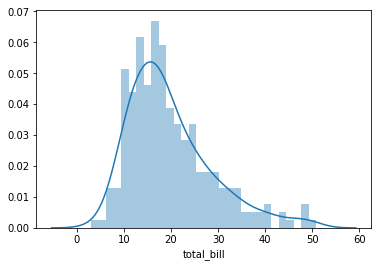

In [5]:
sns.distplot(tips['total_bill'], bins = 30) #kde: kernel density estimator, is present here but we can disable it to just get a histogram
#use additional argument kde=False
#bins is how many boxes


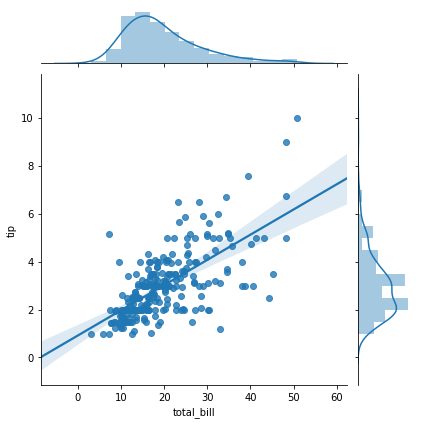

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')
#this is basically plotting one against the other and providing data as the third argument
#kind is what kind of plot we want. Google for extra options Example: regression: reg

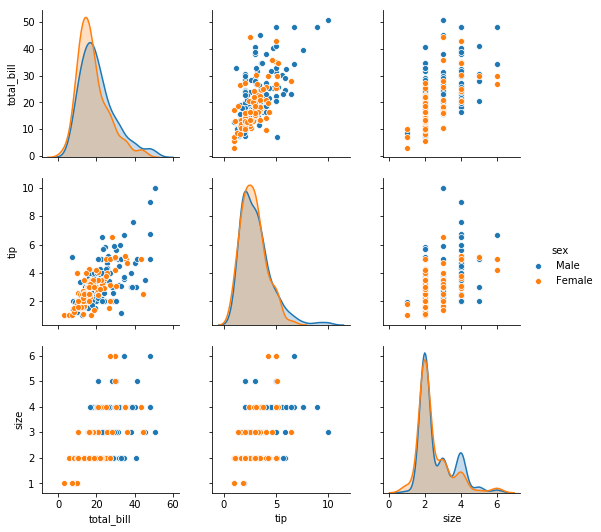

In [7]:
sns.pairplot(tips, hue='sex')
#Compares every data with every other numerical data
#hue just categorizes the column passed in based on how many datapoints

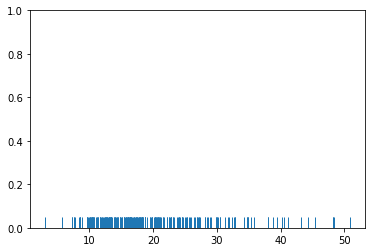

In [8]:
sns.rugplot(tips['total_bill']) #Just draws dash point for each datapoint

(0, 1)

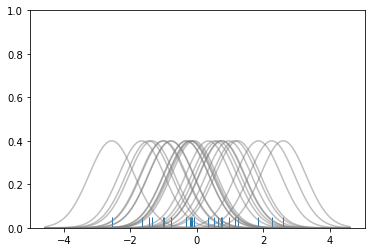

In [9]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

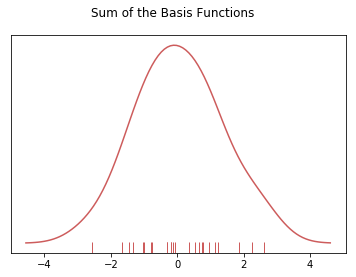

In [10]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

# Categorical Plots

In [11]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


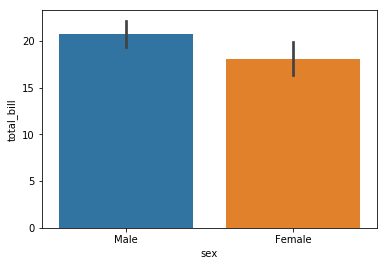

In [14]:
#for the categorical data, what we can do is choose a categorical data for the x axis and choose a numerical column for
# the y axis

sns.barplot(x='sex',y='total_bill',data=tips)

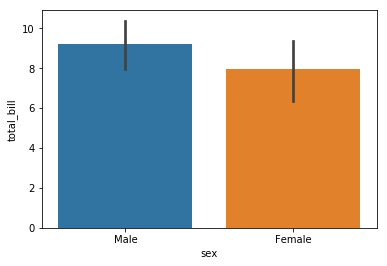

In [15]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) #estimator is mean by default but you can choose it to be whatever you want

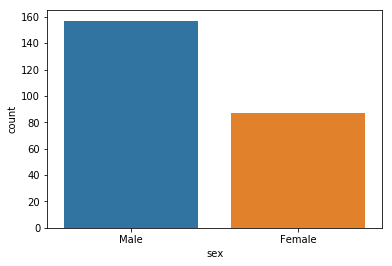

In [18]:
sns.countplot(x = 'sex', data = tips) #this just counts the occurences like for example there are almost 160 makes and
# 100 females

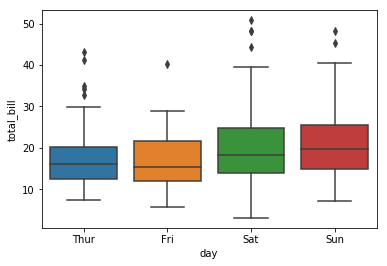

In [21]:
sns.boxplot(x='day',y='total_bill', data=tips) #box and whiskers. Day is a categorical data while total is numerical

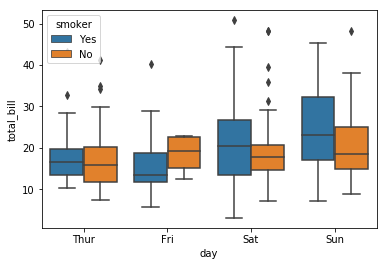

In [23]:
sns.boxplot(x='day',y='total_bill', data=tips, hue = 'smoker') #you can add hue indicator to get a new layer of data
#i.e you can get a smoker/non smoker data

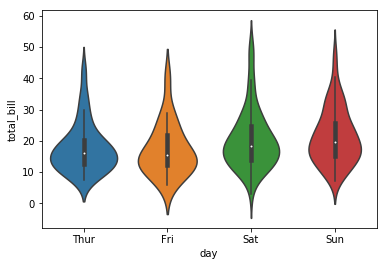

In [29]:
sns.violinplot(x='day',y='total_bill', data=tips) #Google violinplots
#Violin plot gives you more data, can also do hue

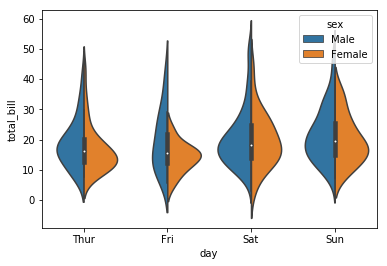

In [30]:
sns.violinplot(x='day',y='total_bill', data=tips, hue = 'sex', split = True)

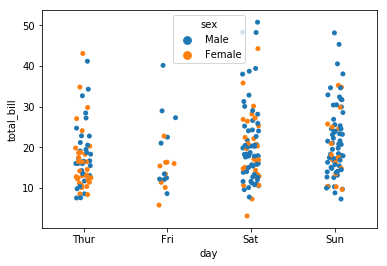

In [35]:
sns.stripplot(x='day', y = 'total_bill', data = tips, hue='sex') #There is some random noise in the data to seperate them so you
#can see them. You can do jitter = False to get the datas streamlined and stacked on top of one another

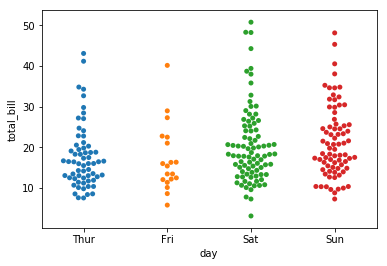

In [38]:
sns.swarmplot(x='day',y='total_bill', data=tips) #combination of voilin plot and swarm plot, i.e takes all the data

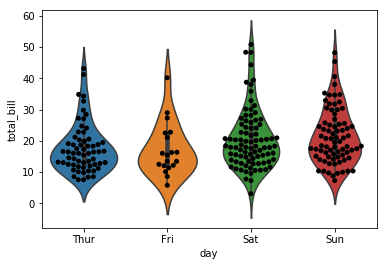

In [40]:
sns.violinplot(x='day',y='total_bill', data=tips)
sns.swarmplot(x='day',y='total_bill', data=tips, color = 'black') #graph can be stacked on top of one another

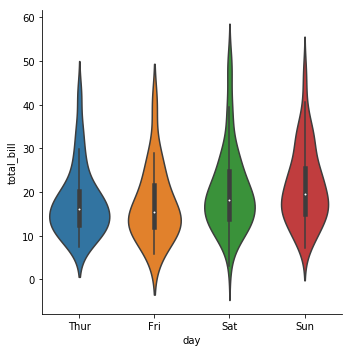

In [47]:
sns.catplot(x = 'day' , y= 'total_bill', data = tips, kind= 'violin') #the name was originally factorplot but now it is catplot

# Matrix Plots

In [50]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights') #there are a bunch of inbuilt datasets that you can use for example
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [56]:
tc = tips.corr() #let's find the correlation data between the tips
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


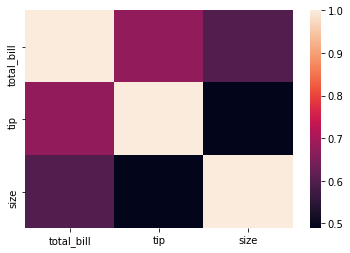

In [57]:
sns.heatmap(tc) #what heat map does is plot the correlation data into a map where light one is higher and darker is lower one

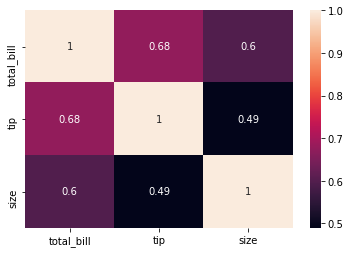

In [59]:
sns.heatmap(tc, annot = True) #we can just annotate the data

In [62]:
fp = flights.pivot_table(index = 'month', columns='year', values='passengers') #if our data lines up correctly,
#we can create a matrix of data using a pivot table
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


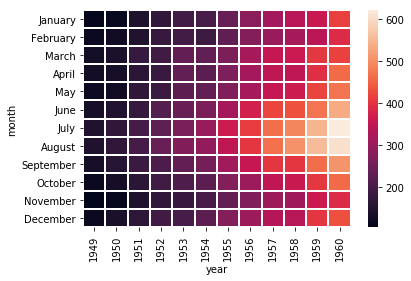

In [67]:
sns.heatmap(fp, linecolor = 'white', linewidths=1) #similar heatmap. To seperate the data use linecolor and linewidths

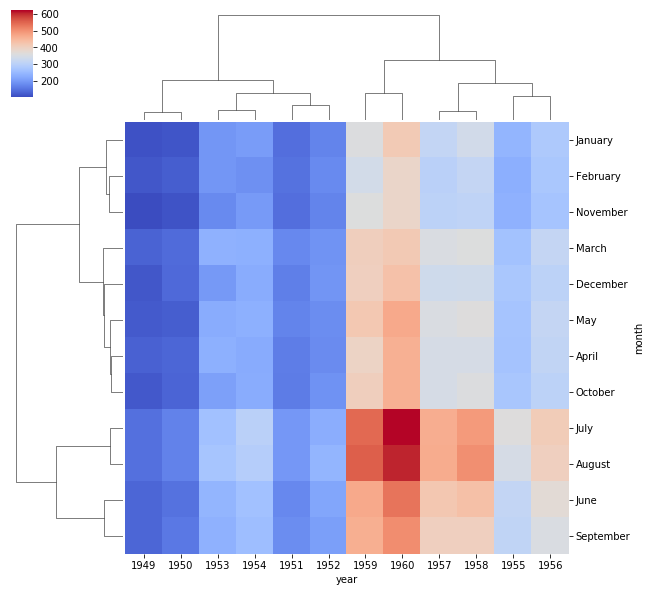

In [70]:
sns.clustermap(fp, cmap = 'coolwarm') #cmap = colormap

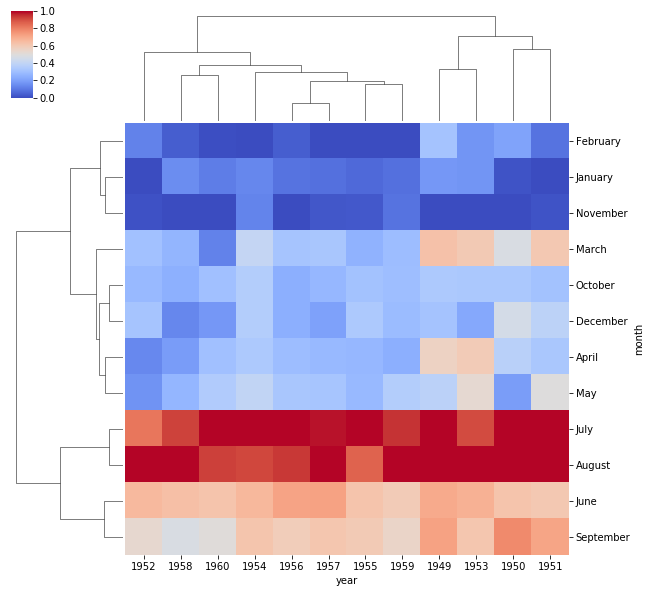

In [72]:
sns.clustermap(fp, cmap = 'coolwarm', standard_scale=1) #based on standard scale of 0-1